# Multiple Regression

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [86]:
df= sns.load_dataset('iris')

In [87]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [88]:
df.isnull().sum() * 100 / len(df)

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64

**Checking Sepal_length**

<Axes: ylabel='sepal_length'>

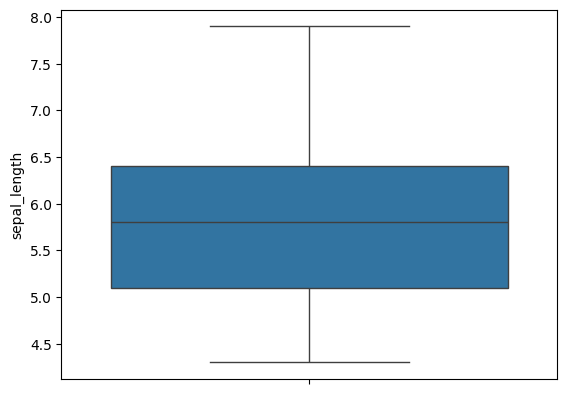

In [89]:
sns.boxplot( y='sepal_length', data=df)

**Sepal_Width**

<Axes: ylabel='sepal_width'>

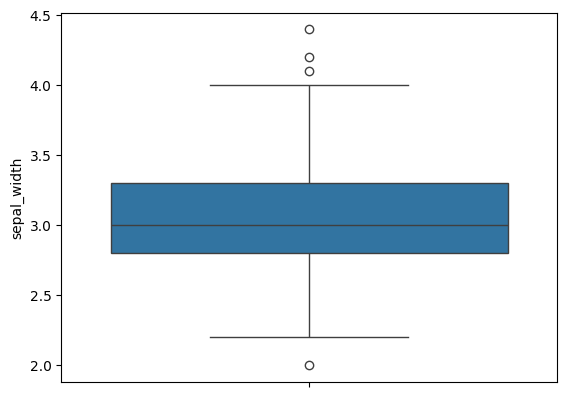

In [90]:
sns.boxplot( y='sepal_width', data=df)

In [91]:
#  removing outliers by IQR method

Q1 = df['sepal_width'].quantile(0.25)
Q3 = df['sepal_width'].quantile(0.75)
IQR = Q3 - Q1

upper_bound= Q3 + 1.5 * IQR
lower_bound= Q1 - 1.5 * IQR

df= df[(df['sepal_width'] > lower_bound) & (df['sepal_width'] < upper_bound)]

<Axes: ylabel='sepal_width'>

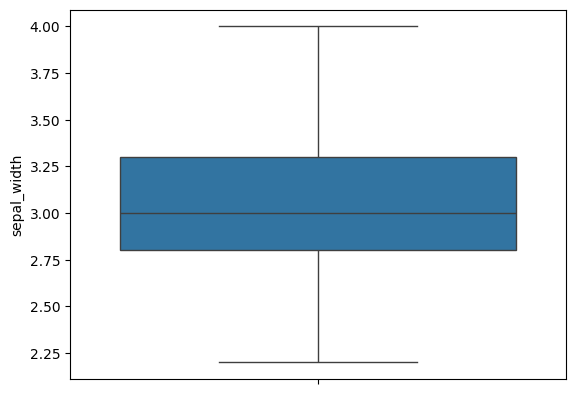

In [92]:
sns.boxplot( y='sepal_width', data=df)

**Petal_length**

<Axes: ylabel='petal_length'>

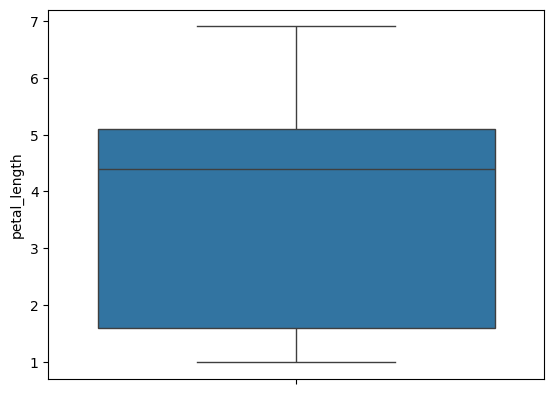

In [93]:
sns.boxplot( y='petal_length', data=df)

<Axes: ylabel='petal_width'>

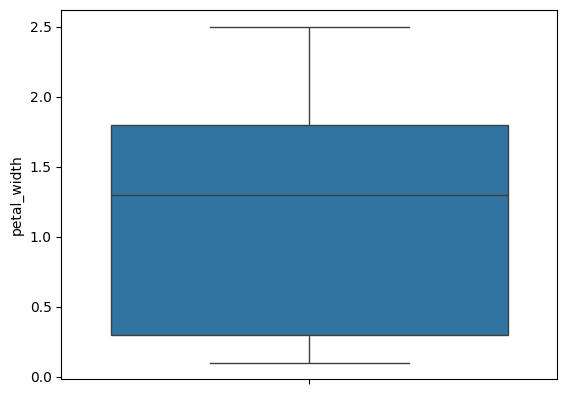

In [94]:
sns.boxplot( y='petal_width', data=df)

In [95]:
df.drop_duplicates(inplace=True)

C:\Users\Fcc\AppData\Local\Temp\ipykernel_4960\3006716147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [96]:
df.shape

(145, 5)

In [97]:
# Normalization by MinMax
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

cols= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df[cols] = scaler.fit_transform(df[cols])



C:\Users\Fcc\AppData\Local\Temp\ipykernel_4960\4281280943.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols] = scaler.fit_transform(df[cols])


<Axes: xlabel='sepal_length', ylabel='Count'>

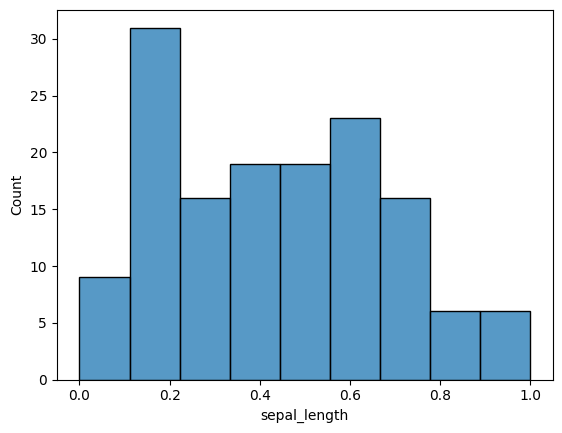

In [98]:
sns.histplot(df['sepal_length'])





<Axes: xlabel='sepal_width', ylabel='Count'>

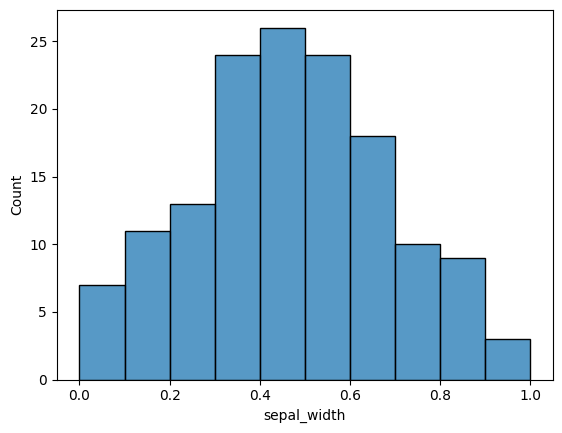

In [99]:
sns.histplot(df['sepal_width'])


<Axes: xlabel='petal_length', ylabel='Count'>

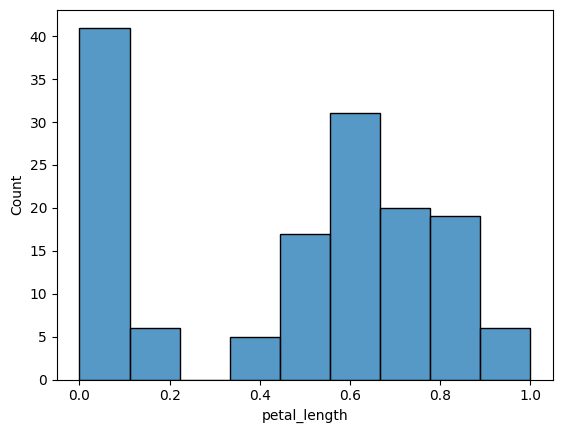

In [100]:

sns.histplot(df['petal_length'])


<Axes: xlabel='petal_width', ylabel='Count'>

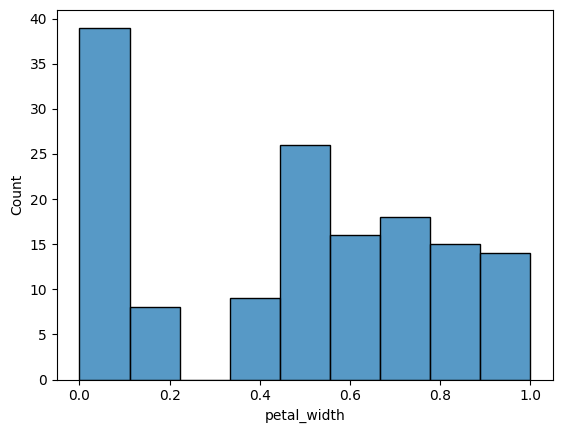

In [101]:
sns.histplot(df['petal_width'])

In [102]:
df1= df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [103]:
x= df1[['sepal_length', 'sepal_width', 'petal_length']]
y= df1['petal_width']

In [104]:
model= LinearRegression()

In [105]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

In [106]:
model.fit(x_train, y_train)

LinearRegression()

In [107]:
prediction= model.predict(x_test)

In [110]:
#  Evaluation

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

MSE= mean_squared_error(y_true=y_test, y_pred=prediction)
RMSE= np.sqrt(MSE)
MAE= mean_absolute_error(y_true=y_test, y_pred=prediction)
R2= r2_score(y_true=y_test, y_pred=prediction)

print('MSE:', MSE)
print('RMSE: ', RMSE)
print('MAE: ', MAE)
print('R2: ', R2)


MSE: 0.007812845071797365
RMSE:  0.08839029964762743
MAE:  0.07197344185861387
R2:  0.9040885160086216


In [111]:
#  coefficients

model.coef_

array([-0.29405639,  0.15752943,  1.28474622])

In [112]:
model.intercept_

-0.090542506225599